In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
df=pd.read_csv('train_Data.csv')

In [16]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [43]:
df_min=df[df['8']==1]

In [44]:
df_min.to_csv('pima_minority_train.csv',index=False)
df_min=pd.read_csv('pima_minority_train.csv')

In [45]:
df_majority=df[df['8']==0]
df_majority.to_csv('pima_majority_train.csv',index=False)
df_majority=pd.read_csv('pima_majority_train.csv')

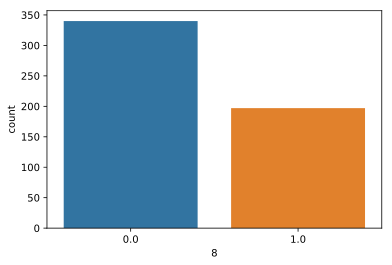

In [19]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [20]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [21]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,3)#5
print(x.shape)
print(y.shape)

(193, 3, 9)
(193, 9)


In [22]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [23]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='mse',optimizer='adam')

In [25]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
115/115 [==============================] - 18s 160ms/step - loss: 0.1612
Epoch 2/500
115/115 [==============================] - 0s 497us/step - loss: 0.1460
Epoch 3/500
115/115 [==============================] - 0s 493us/step - loss: 0.1312
Epoch 4/500
115/115 [==============================] - 0s 466us/step - loss: 0.1177
Epoch 5/500
115/115 [==============================] - 0s 480us/step - loss: 0.1056
Epoch 6/500
115/115 [==============================] - 0s 532us/step - loss: 0.0949
Epoch 7/500
115/115 [==============================] - 0s 466us/step - loss: 0.0851
Epoch 8/500
115/115 [==============================] - 0s 471us/step - loss: 0.0763
Epoch 9/500
115/115 [==============================] - 0s 462us/step - loss: 0.0681
Epoch 10/500
115/115 [==============================] - 0s 453us/step - loss: 0.0605
Epoch 11/500
115/115 [==============================] - 0s 440us/step - loss: 0.0538
Epoch 12/500
115/115 [==============================] - 0s 475us/step - l

115/115 [==============================] - 0s 580us/step - loss: 0.0275
Epoch 98/500
115/115 [==============================] - 0s 641us/step - loss: 0.0275
Epoch 99/500
115/115 [==============================] - 0s 549us/step - loss: 0.0275
Epoch 100/500
115/115 [==============================] - 0s 536us/step - loss: 0.0275
Epoch 101/500
115/115 [==============================] - 0s 558us/step - loss: 0.0275
Epoch 102/500
115/115 [==============================] - 0s 567us/step - loss: 0.0275
Epoch 103/500
115/115 [==============================] - 0s 588us/step - loss: 0.0274
Epoch 104/500
115/115 [==============================] - 0s 584us/step - loss: 0.0274
Epoch 105/500
115/115 [==============================] - 0s 575us/step - loss: 0.0274
Epoch 106/500
115/115 [==============================] - 0s 571us/step - loss: 0.0274
Epoch 107/500
115/115 [==============================] - 0s 549us/step - loss: 0.0273
Epoch 108/500
115/115 [==============================] - 0s 597us/step

115/115 [==============================] - 0s 567us/step - loss: 0.0259
Epoch 193/500
115/115 [==============================] - 0s 584us/step - loss: 0.0259
Epoch 194/500
115/115 [==============================] - 0s 629us/step - loss: 0.0259
Epoch 195/500
115/115 [==============================] - 0s 571us/step - loss: 0.0259
Epoch 196/500
115/115 [==============================] - 0s 576us/step - loss: 0.0259
Epoch 197/500
115/115 [==============================] - 0s 554us/step - loss: 0.0258
Epoch 198/500
115/115 [==============================] - 0s 484us/step - loss: 0.0258
Epoch 199/500
115/115 [==============================] - 0s 514us/step - loss: 0.0258
Epoch 200/500
115/115 [==============================] - 0s 488us/step - loss: 0.0258
Epoch 201/500
115/115 [==============================] - 0s 545us/step - loss: 0.0259
Epoch 202/500
115/115 [==============================] - 0s 519us/step - loss: 0.0258
Epoch 203/500
115/115 [==============================] - 0s 497us/st

115/115 [==============================] - 0s 569us/step - loss: 0.0247
Epoch 288/500
115/115 [==============================] - 0s 519us/step - loss: 0.0247
Epoch 289/500
115/115 [==============================] - 0s 575us/step - loss: 0.0246
Epoch 290/500
115/115 [==============================] - 0s 549us/step - loss: 0.0246
Epoch 291/500
115/115 [==============================] - 0s 575us/step - loss: 0.0246
Epoch 292/500
115/115 [==============================] - 0s 602us/step - loss: 0.0247
Epoch 293/500
115/115 [==============================] - 0s 523us/step - loss: 0.0246
Epoch 294/500
115/115 [==============================] - 0s 449us/step - loss: 0.0246
Epoch 295/500
115/115 [==============================] - 0s 514us/step - loss: 0.0246
Epoch 296/500
115/115 [==============================] - 0s 545us/step - loss: 0.0246
Epoch 297/500
115/115 [==============================] - 0s 488us/step - loss: 0.0246
Epoch 298/500
115/115 [==============================] - 0s 549us/st

115/115 [==============================] - 0s 567us/step - loss: 0.0239
Epoch 383/500
115/115 [==============================] - 0s 519us/step - loss: 0.0239
Epoch 384/500
115/115 [==============================] - 0s 488us/step - loss: 0.0239
Epoch 385/500
115/115 [==============================] - 0s 549us/step - loss: 0.0239
Epoch 386/500
115/115 [==============================] - 0s 545us/step - loss: 0.0239
Epoch 387/500
115/115 [==============================] - 0s 475us/step - loss: 0.0239
Epoch 388/500
115/115 [==============================] - 0s 527us/step - loss: 0.0239
Epoch 389/500
115/115 [==============================] - 0s 501us/step - loss: 0.0239
Epoch 390/500
115/115 [==============================] - 0s 488us/step - loss: 0.0239
Epoch 391/500
115/115 [==============================] - 0s 493us/step - loss: 0.0239
Epoch 392/500
115/115 [==============================] - 0s 519us/step - loss: 0.0238
Epoch 393/500
115/115 [==============================] - 0s 493us/st

115/115 [==============================] - 0s 632us/step - loss: 0.0233
Epoch 478/500
115/115 [==============================] - 0s 575us/step - loss: 0.0233
Epoch 479/500
115/115 [==============================] - 0s 626us/step - loss: 0.0233
Epoch 480/500
115/115 [==============================] - 0s 571us/step - loss: 0.0233
Epoch 481/500
115/115 [==============================] - 0s 545us/step - loss: 0.0233
Epoch 482/500
115/115 [==============================] - 0s 606us/step - loss: 0.0232
Epoch 483/500
115/115 [==============================] - 0s 514us/step - loss: 0.0233
Epoch 484/500
115/115 [==============================] - 0s 549us/step - loss: 0.0233
Epoch 485/500
115/115 [==============================] - 0s 584us/step - loss: 0.0232
Epoch 486/500
115/115 [==============================] - 0s 504us/step - loss: 0.0232
Epoch 487/500
115/115 [==============================] - 0s 549us/step - loss: 0.0232
Epoch 488/500
115/115 [==============================] - 0s 593us/st

In [26]:
model.save('7-24-2019-pima.h5')

In [27]:
Xtrain.shape

(115, 3, 9)

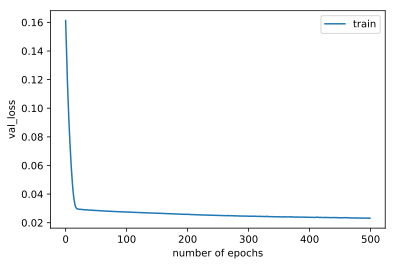

In [28]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [29]:
prediction=model.predict(xtest)

In [30]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

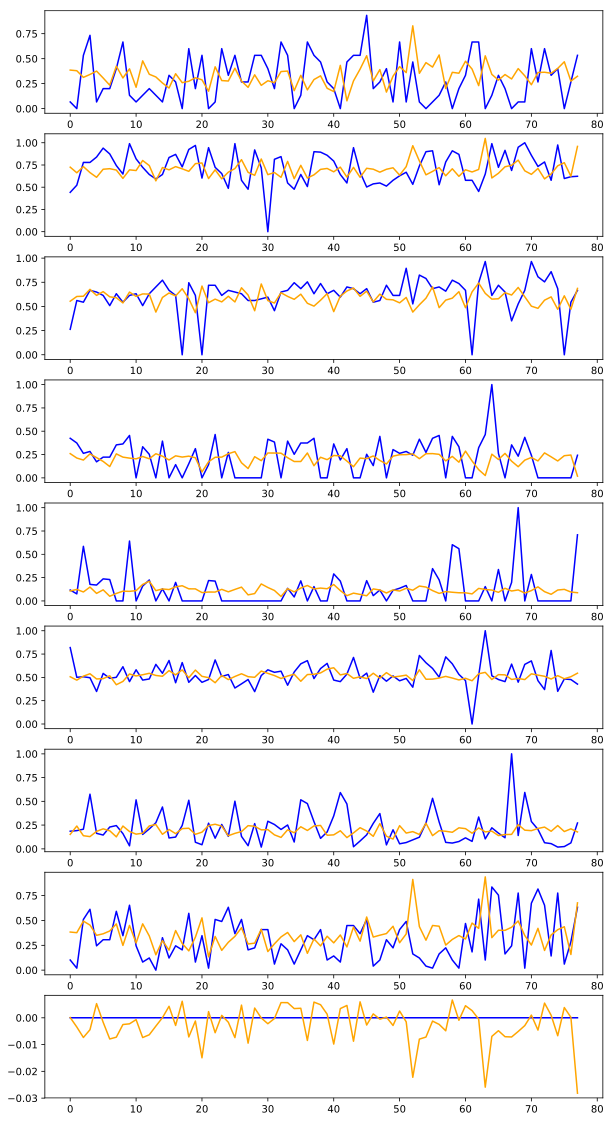

In [31]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [32]:
prediction

array([[ 3.85501772e-01,  7.25578845e-01,  5.54037869e-01,
         2.59793878e-01,  1.06477268e-01,  5.06858230e-01,
         1.52362689e-01,  3.83495271e-01,  9.39927995e-05],
       [ 3.79228264e-01,  6.62433565e-01,  6.03226244e-01,
         2.12536961e-01,  1.23574756e-01,  4.70334172e-01,
         2.39912018e-01,  3.77000183e-01, -3.44722345e-03],
       [ 3.12567919e-01,  7.31909752e-01,  6.05612040e-01,
         1.90772593e-01,  9.59707573e-02,  5.13221443e-01,
         1.38319939e-01,  4.93293911e-01, -7.35587254e-03],
       [ 3.41854393e-01,  6.64590776e-01,  6.76950276e-01,
         2.56709754e-01,  1.48574859e-01,  5.39069176e-01,
         1.28824815e-01,  4.53489721e-01, -4.46894392e-03],
       [ 3.75395745e-01,  6.11645818e-01,  6.14065528e-01,
         2.17171550e-01,  8.07304978e-02,  4.83064234e-01,
         1.84105352e-01,  3.50480944e-01,  5.28288260e-03],
       [ 3.06592554e-01,  7.02177882e-01,  6.53273046e-01,
         1.76069945e-01,  1.18844949e-01,  4.863640

In [33]:
prediction2=scaler.inverse_transform(prediction)

In [34]:
ytest2=scaler.inverse_transform(ytest)

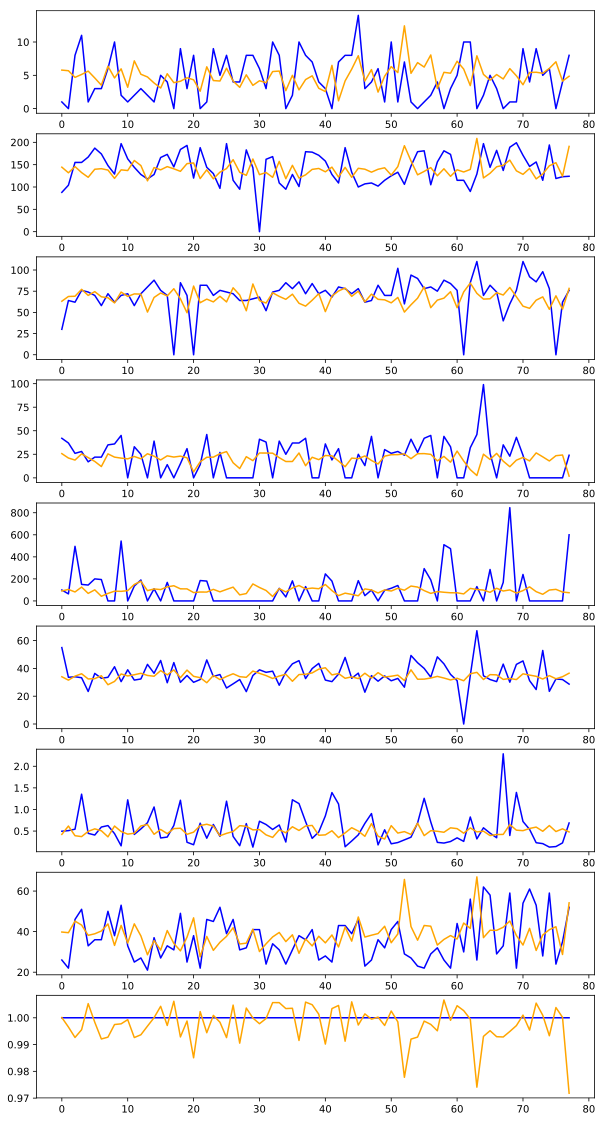

In [35]:
draw_prediction(ytest2,prediction2,clmns)

In [36]:
prediction

array([[ 3.85501772e-01,  7.25578845e-01,  5.54037869e-01,
         2.59793878e-01,  1.06477268e-01,  5.06858230e-01,
         1.52362689e-01,  3.83495271e-01,  9.39927995e-05],
       [ 3.79228264e-01,  6.62433565e-01,  6.03226244e-01,
         2.12536961e-01,  1.23574756e-01,  4.70334172e-01,
         2.39912018e-01,  3.77000183e-01, -3.44722345e-03],
       [ 3.12567919e-01,  7.31909752e-01,  6.05612040e-01,
         1.90772593e-01,  9.59707573e-02,  5.13221443e-01,
         1.38319939e-01,  4.93293911e-01, -7.35587254e-03],
       [ 3.41854393e-01,  6.64590776e-01,  6.76950276e-01,
         2.56709754e-01,  1.48574859e-01,  5.39069176e-01,
         1.28824815e-01,  4.53489721e-01, -4.46894392e-03],
       [ 3.75395745e-01,  6.11645818e-01,  6.14065528e-01,
         2.17171550e-01,  8.07304978e-02,  4.83064234e-01,
         1.84105352e-01,  3.50480944e-01,  5.28288260e-03],
       [ 3.06592554e-01,  7.02177882e-01,  6.53273046e-01,
         1.76069945e-01,  1.18844949e-01,  4.863640

In [37]:
new_data=pd.DataFrame(prediction2)

In [40]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)